In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('S:/ml resources/data.csv')

In [4]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

checking for unique values

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

checking on unique values

In [11]:
print("categories in gender values"  , end=" ")
print(df["gender"].unique())

print("categories in parental education values"  , end=" ")
print(df["parental_level_of_education"].unique())

print("categories in lunch values"  , end=" ")
print(df["lunch"].unique())

print("categories in test_preparation values"  , end=" ")
print(df["test_preparation_course"].unique())

print("categories in race_ethnicity values"  , end=" ")
print(df["race_ethnicity"].unique())

categories in gender values ['female' 'male']
categories in parental education values ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch values ['standard' 'free/reduced']
categories in test_preparation values ['none' 'completed']
categories in race_ethnicity values ['group B' 'group C' 'group A' 'group D' 'group E']


checking for statistical features 

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


counting on numerical and categorical features

In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#printing numerical and categorical values
print("numerical values count {} : \n{} are numerical values.".format(len(numerical_features),numerical_features))
print("\ncategorical values count {} :\n {} are categorical values.".format(len(categorical_features),categorical_features))

numerical values count 3 : 
['math_score', 'reading_score', 'writing_score'] are numerical values.

categorical values count 5 :
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] are categorical values.


Adding columns for total score and average

In [14]:
# Creating output features like total score,average score
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
math_full = df[df['math_score']==100]['average'].count()
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()

print(f"number of students with full marks in math :{math_full}")
print(f"number of students with full marks in reading  :{reading_full}")
print(f"number of students with full marks in writing  :{writing_full}")

number of students with full marks in math :7
number of students with full marks in reading  :17
number of students with full marks in writing  :14


In [16]:
failed_math = df[df["math_score"]<35]['average'].count()
failed_reading = df[df["reading_score"]<35]['average'].count()
failed_writing = df[df["writing_score"]<35]['average'].count()

print(f" Math failed students :{failed_math} \n Reading failed students: {failed_reading} \n Writing failed students:{failed_writing}")

 Math failed students :22 
 Reading failed students: 15 
 Writing failed students:17


# EDA performing through visualizations

Visualize average score distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)

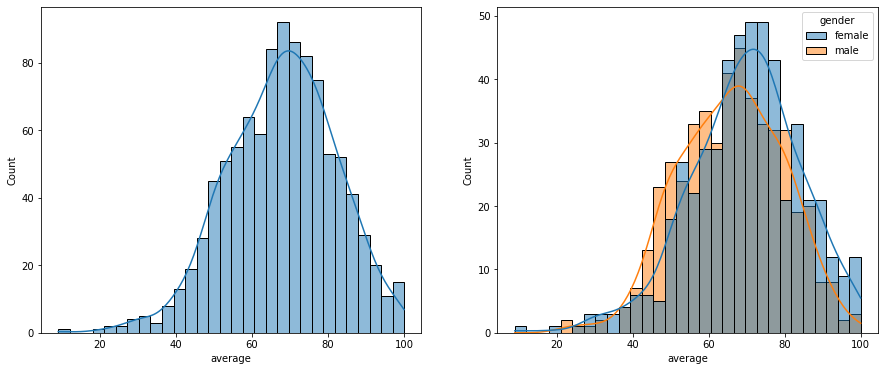

In [17]:
# Drawing histogram
fig,axs = plt.subplots(1,2 ,figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,bins=30,hue='gender' ,color=['Red','Blue'])
plt.show()

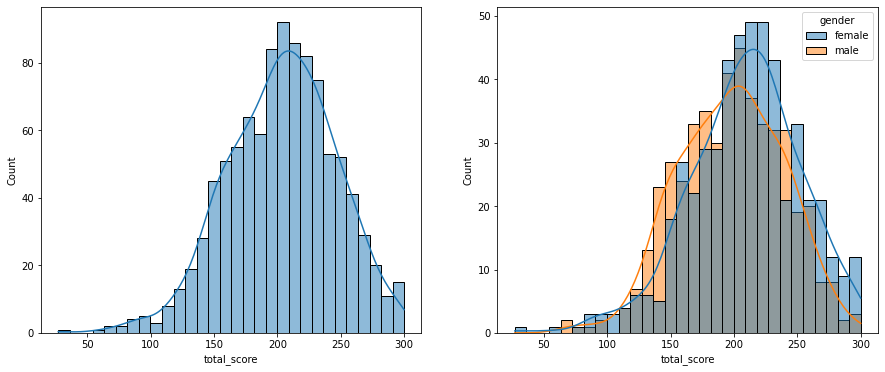

In [18]:
fig,axs = plt.subplots(1,2 ,figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,bins=30,hue='gender' ,color=['Red','Blue'])
plt.show()

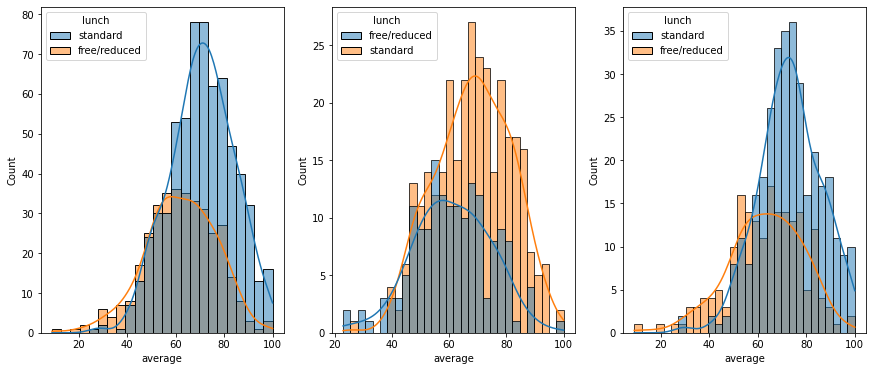

In [19]:
fig,axs = plt.subplots(1,3 ,figsize=(20,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,bins=30,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df["gender"]=='female'],x='average',kde=True,bins=30,hue='lunch' ,color=['Red','Blue'])
plt.show()

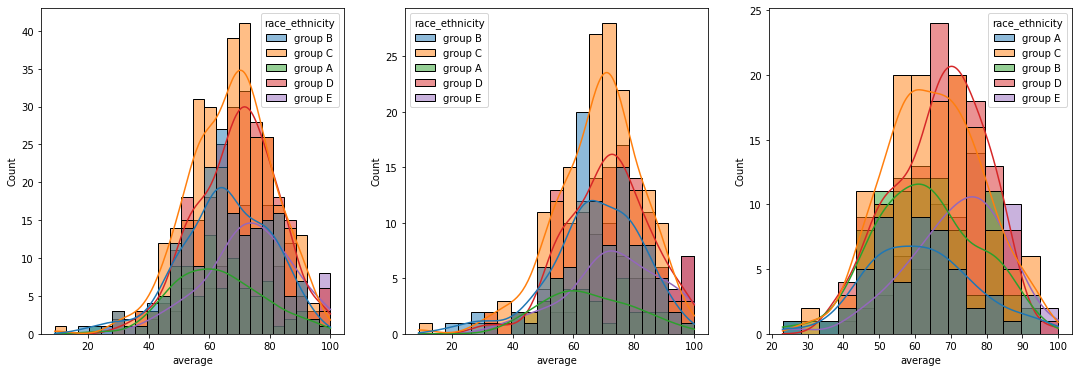

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

<AxesSubplot:ylabel='writing_score'>

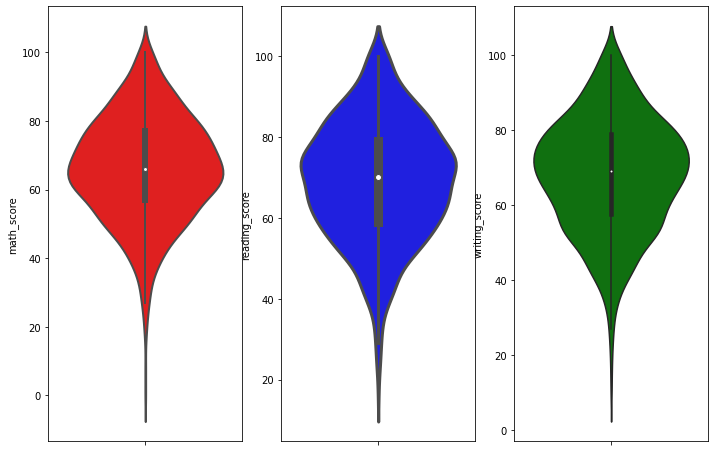

In [24]:
# good for knowing outliners 
# also boxplot is good for outliners
# One using Interquartile Ranges.
# Second using Standard deviation.
plt.figure(figsize=(16,8))
plt.subplot(1,4,1)
sns.violinplot(data=df,y='math_score',color='Red',linewidth=2)
plt.subplot(1,4,2)
sns.violinplot(data=df,y='reading_score',color='Blue',linewidth=3)
plt.subplot(1,4,3)
sns.violinplot(data=df,y= 'writing_score',color="green")

{'whiskers': [<matplotlib.lines.Line2D at 0x1e41c159d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1e41c169340>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e41c1599a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1e41c1698e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e41c169bb0>,
 'means': []}

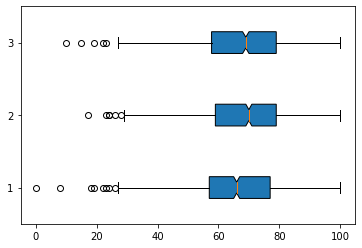

In [34]:
data= [df['math_score'],df['reading_score'],df['writing_score']]
plt.boxplot(data,patch_artist = True,
                notch ='True', vert = 0)

multivariate analysis using pieplot

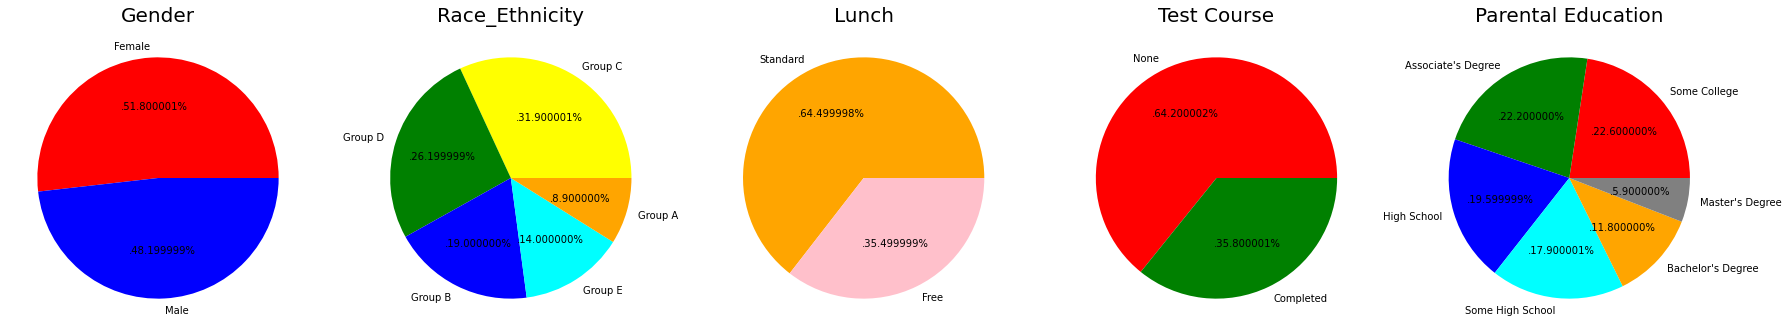

In [52]:
plt.rcParams['figure.figsize'] = (25, 17)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','blue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['yellow', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['orange','pink']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%1f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%1f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# Feature Wise Visualization

GENDER COLUMN
How is distribution of Gender ?
Is gender has any impact on student's performance ?

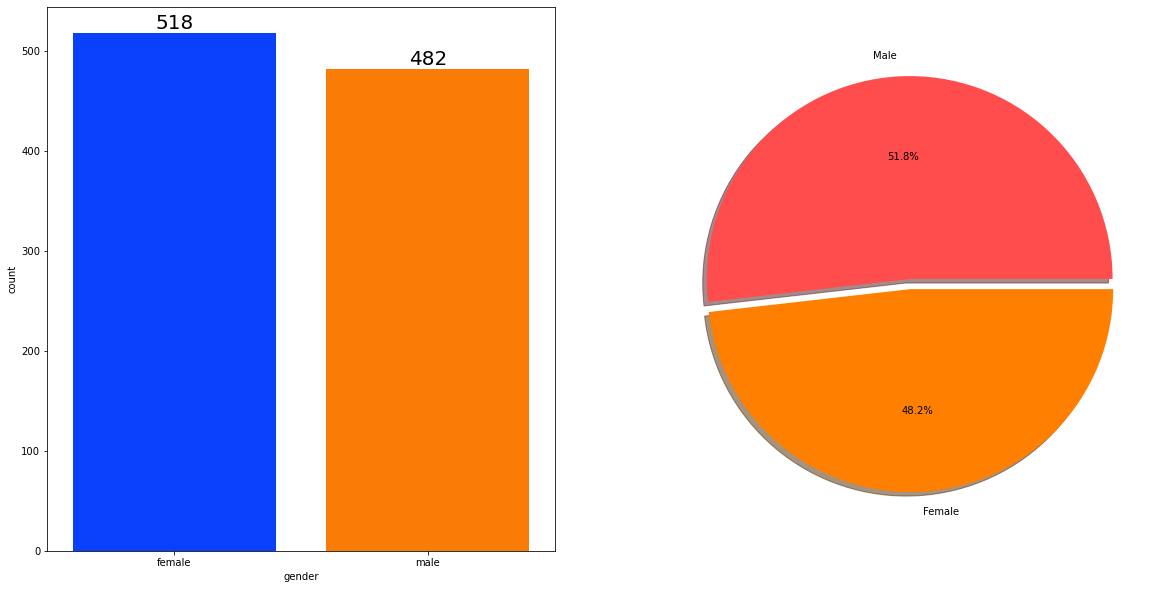

In [66]:
f,ax= plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,ax=ax[0],palette='bright',saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.05],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

here we can see , both number of females and males are almost equal

# BIVARIATE ANALYSIS
( Is gender has any impact on student's performance ? )

In [71]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


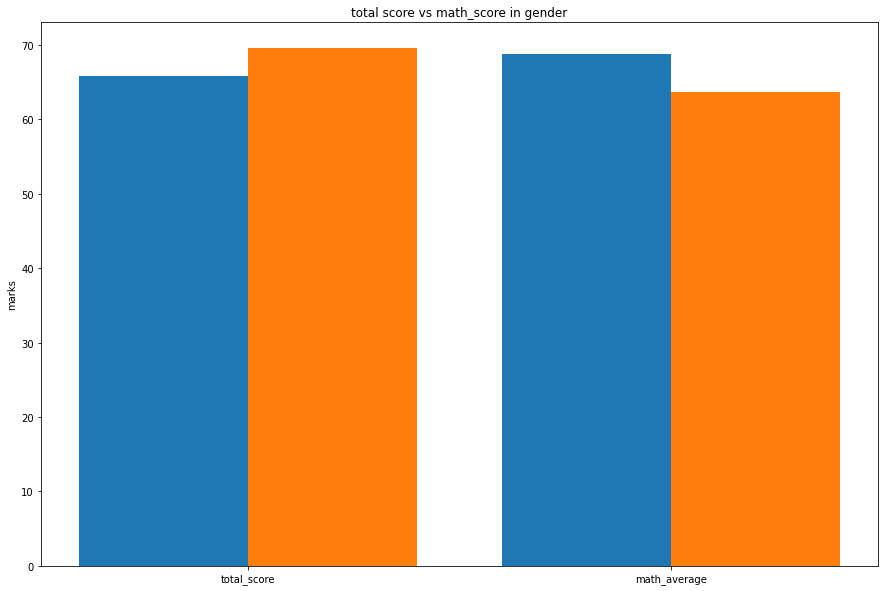

In [85]:
plt.figure(figsize=(15,10))

X=['total_score','math_average']

female_scores = gender_group['average'][0],gender_group['math_score'][0]
male_scores =  gender_group['average'][1],gender_group['math_score'][1]

x_axis = np.arange(len(X))

plt.bar(x_axis - 0.2 ,male_scores ,0.4 ,label='male' )
plt.bar(x_axis + 0.2 ,female_scores ,0.4 ,label='female' )

plt.xticks(x_axis ,X )
plt.title("total score vs math_score in gender")
plt.ylabel('marks')
plt.show()

# UNIVARIATE ANALYSIS
( How is Group wise distribution ?)

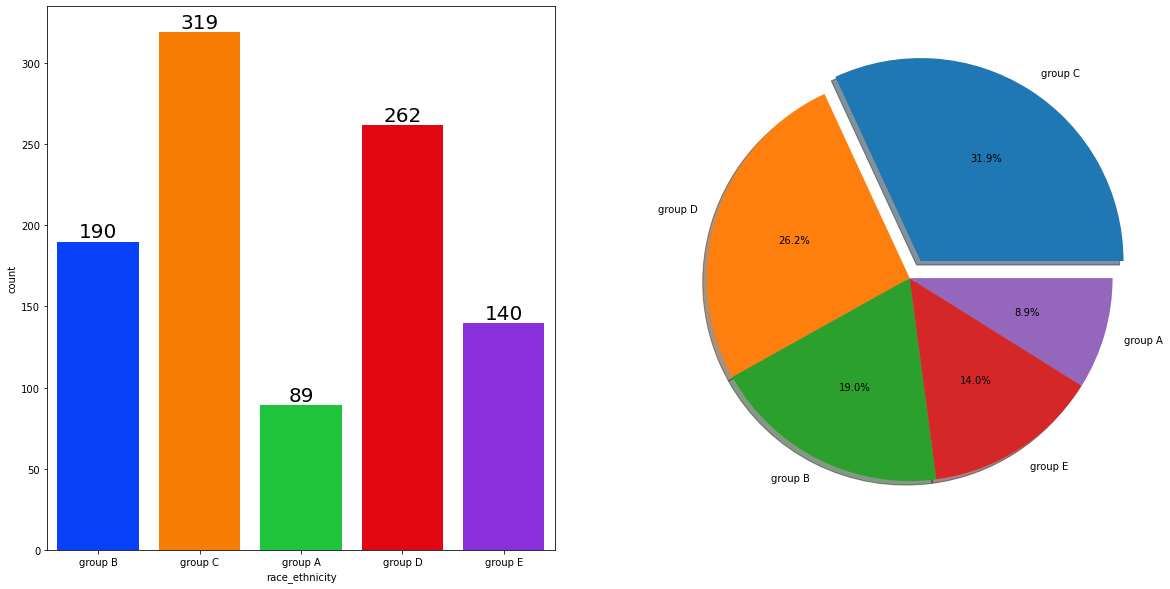

In [88]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

# Insights
Most of the student belonging from group C /group D.
Lowest number of students belong to groupA.

# BIVARIATE ANALYSIS 
( Is Race/Ehnicity has any impact on student's performance ? )

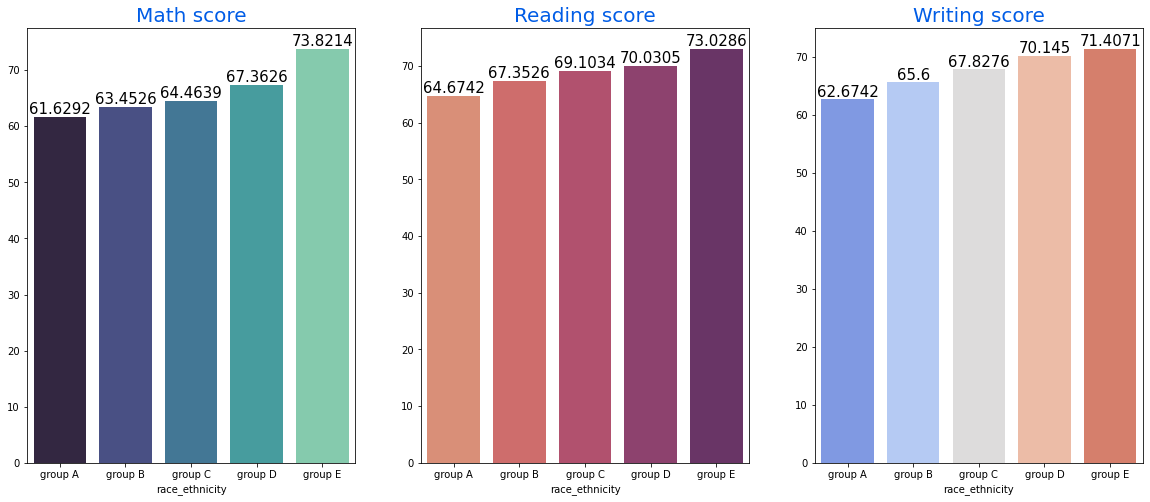

In [91]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
What is educational background of student's parent ?
Is parental education has any impact on student's performance ?
UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

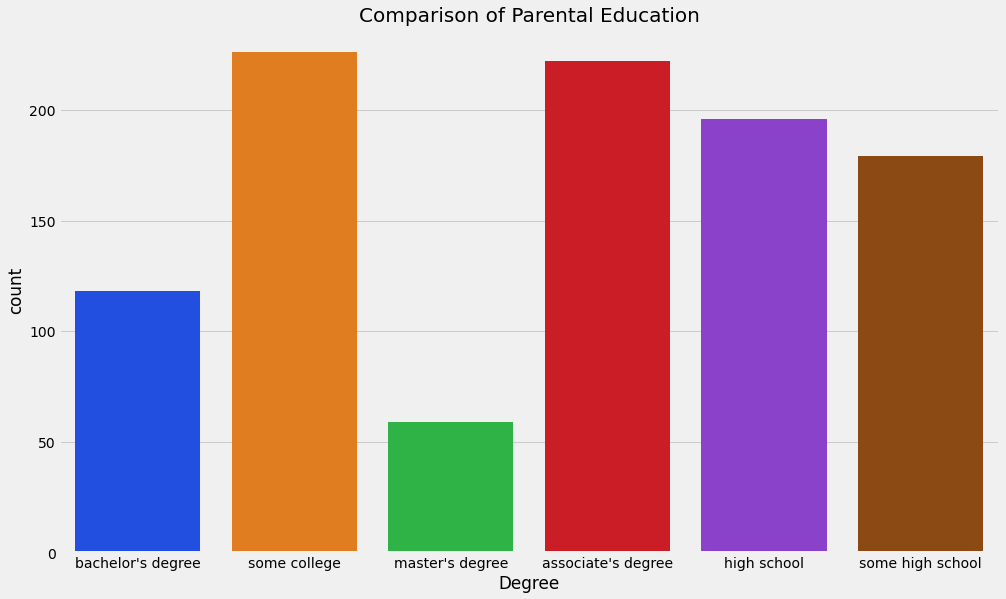

In [96]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'bright')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

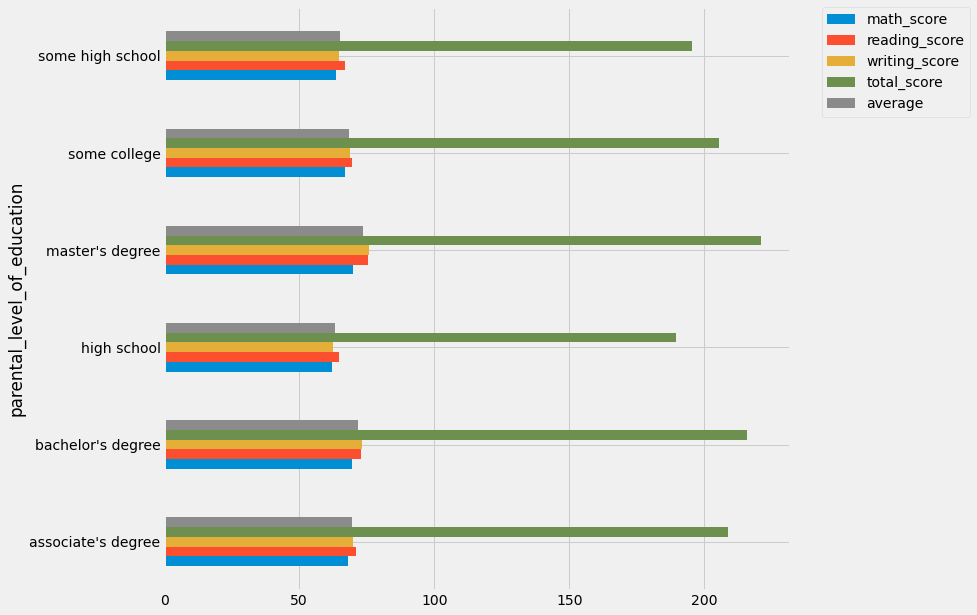

In [102]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 4.4.4 LUNCH COLUMN
Which type of lunch is most common amoung students ?
What is the effect of lunch type on test results?
UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

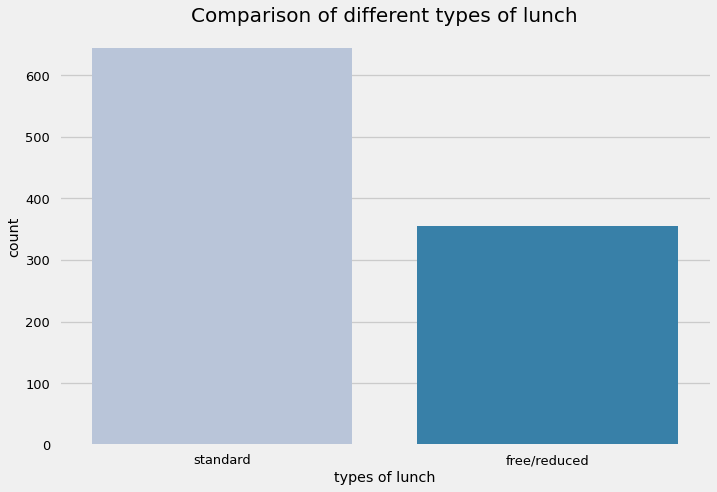

In [103]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

# BIVARIATE ANALYSIS
( Is lunch type intake has any impact on student's performance ? )

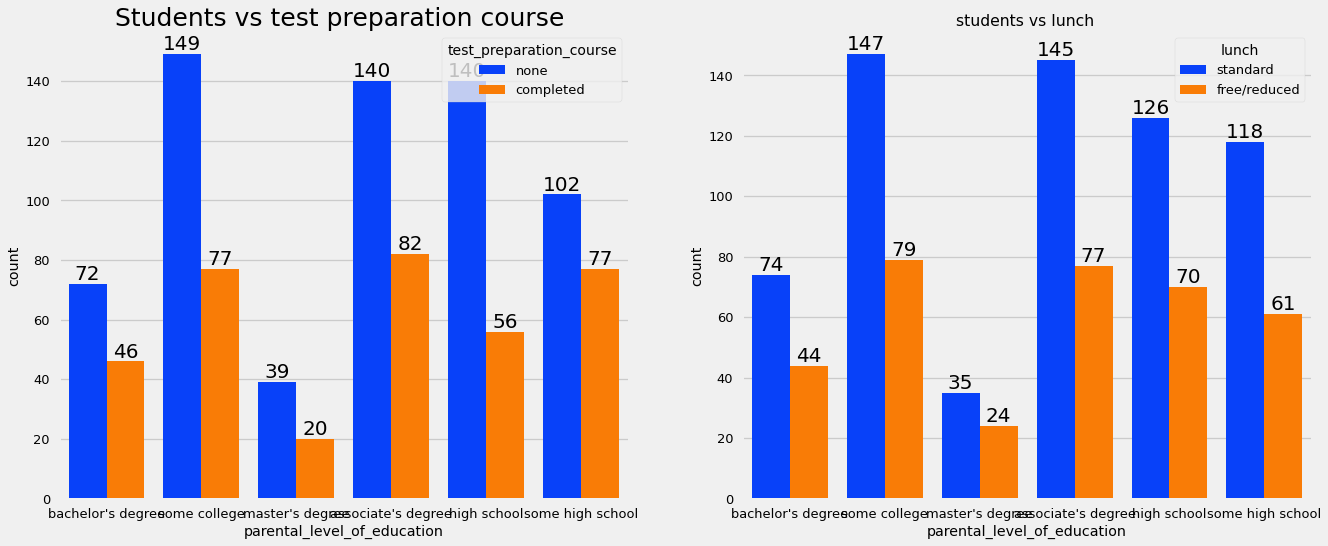

In [112]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title("students vs lunch ")
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

# BIVARIATE ANALYSIS 
( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

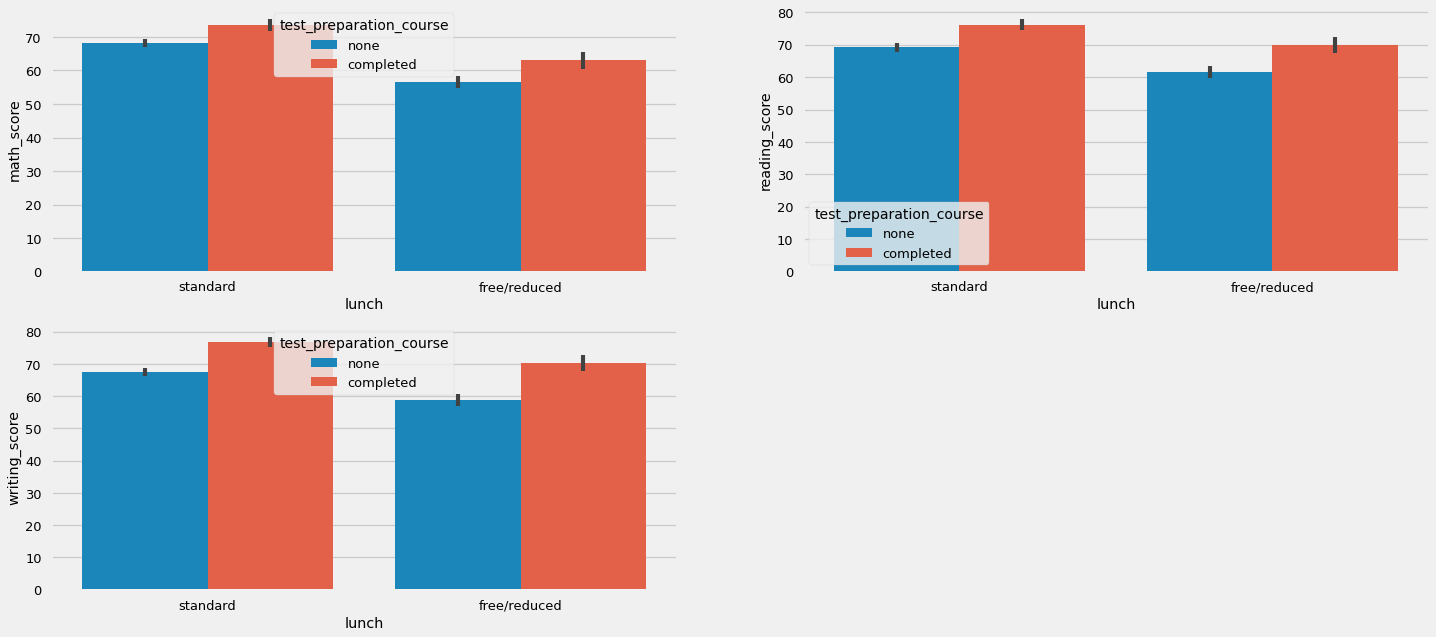

In [117]:
plt.figure(figsize=(22,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

# CHECKING OUTLIERS

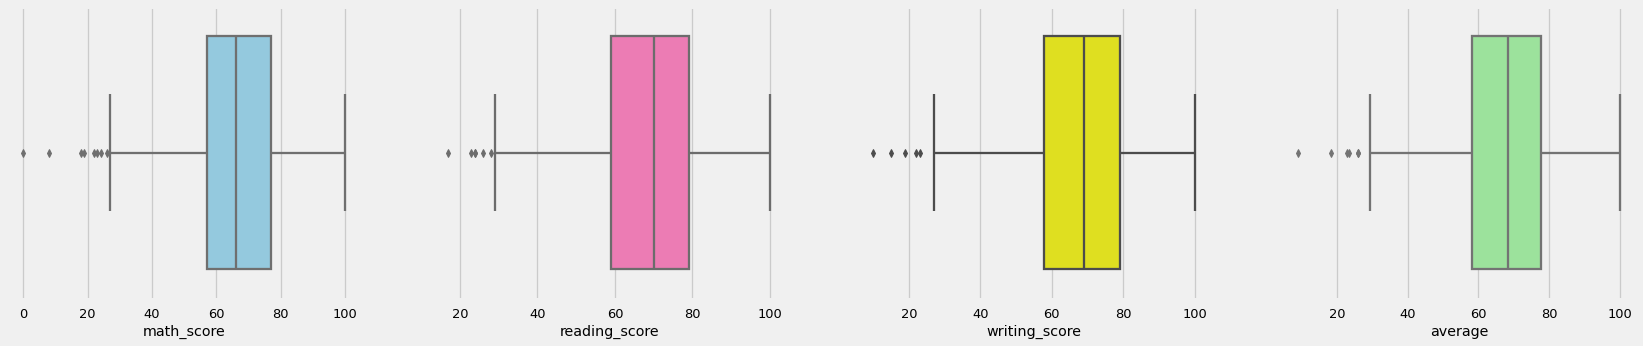

In [123]:
plt.subplots(1,4,figsize=(26,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

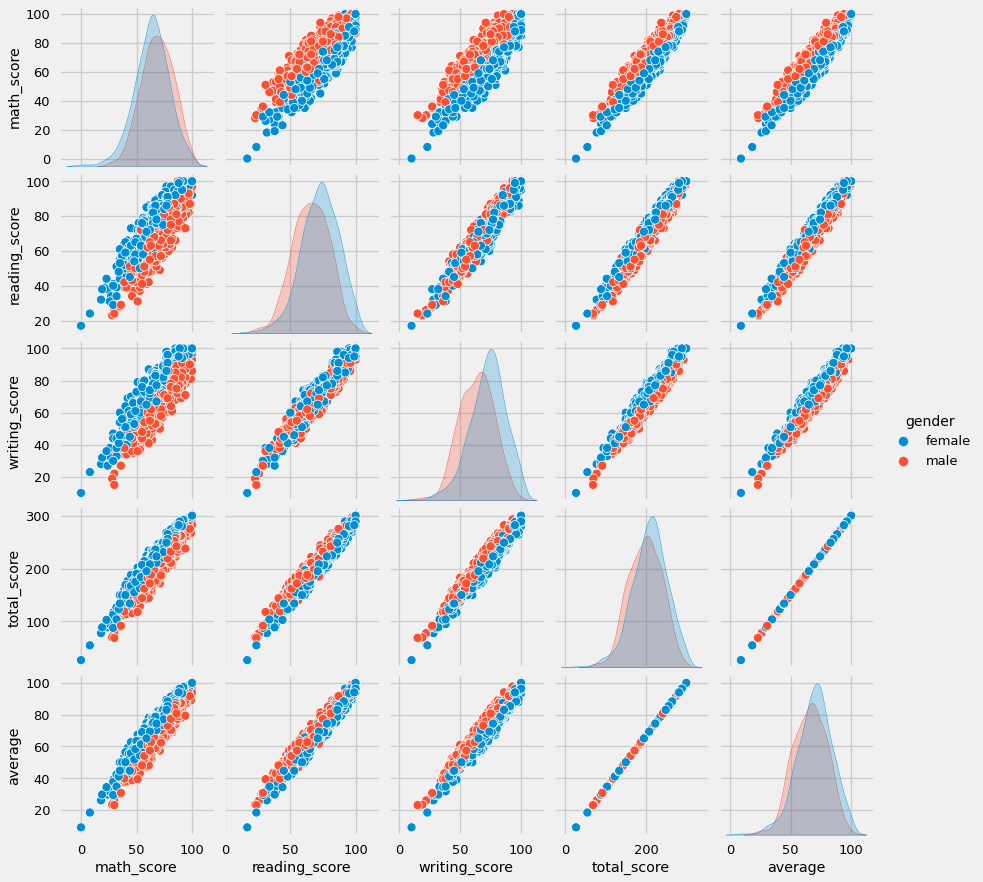

In [120]:
sns.pairplot(df,hue = 'gender')
plt.show()

# 5. Conclusions
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.